In [177]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [178]:
# Load the dataset
data = pd.read_csv('RS_Session_256_AU_95_C.csv')
data.fillna(0,inplace=True)
data.head(10)



,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780


In [179]:
print(data.head())
print(data.describe())
print(data.info())


                   State Name  Two Wheeler  Three Wheeler  Four Wheeler  \
0  Andaman and Nicobar Island            1           30.0            81   
1           Arunachal Pradesh           14            0.0             5   
2                       Assam          721        47041.0           161   
3                       Bihar         5003        59079.0           114   
4                  Chandigarh          298         1410.0           182   

   Goods Vehicles  Public Service Vehicle  Special Category Vehicles  \
0             0.0                    40.0                        0.0   
1             0.0                     0.0                        0.0   
2             7.0                    15.0                        0.0   
3            11.0                    26.0                        0.0   
4             0.0                    40.0                        0.0   

   Ambulance/Hearses  Construction Equipment Vehicle  Other  Grand Total  
0                0.0                     

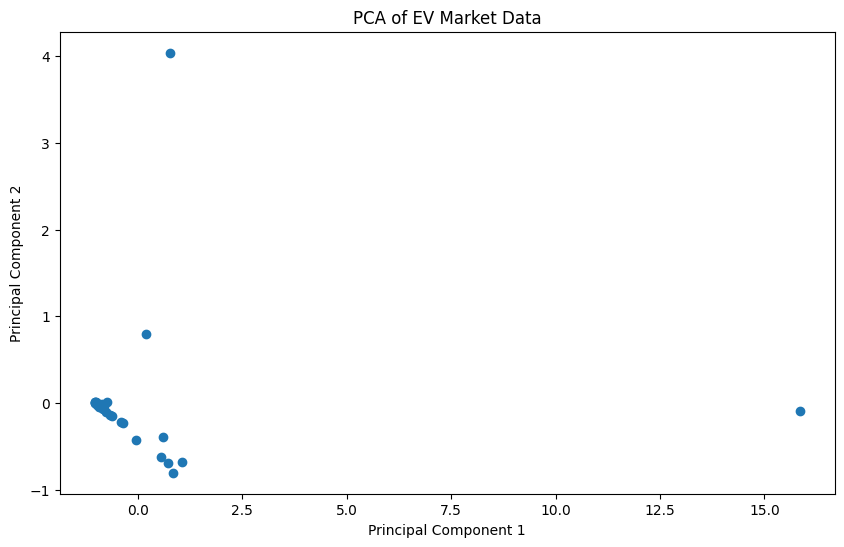

In [180]:
# Standardizing the features
X = data.drop(['State Name'], axis=1) 
X_std = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Plotting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of EV Market Data')
plt.show()


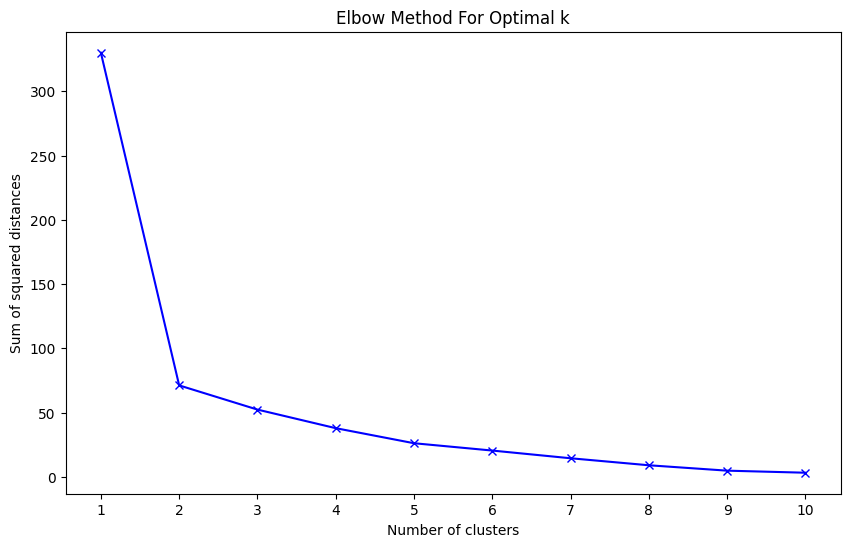

In [181]:
# Calculating the sum of squared distances for k in the range 1-10
ssd = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k,n_init=10)
    km = km.fit(X_std)
    ssd.append(km.inertia_)

# Plotting the "Elbow" graph
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(K)
plt.title('Elbow Method For Optimal k')
plt.show()

In [182]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3,n_init=10) 
clusters = kmeans.fit_predict(X_std)
data['Cluster'] = clusters

# Cluster Analysis
print(data.groupby('Cluster').mean())


           Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
Cluster                                                               
0          8907.032258   20704.677419    845.741935       63.193548   
1        282542.000000  647186.000000  26335.000000     3036.000000   
2          6424.000000    5341.000000    117.000000     1077.000000   

         Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses  \
Cluster                                                                         
0                     65.741935                  13.225806           0.193548   
1                   2039.000000                 410.000000           6.000000   
2                      1.000000                   0.000000           0.000000   

         Construction Equipment Vehicle        Other   Grand Total  
Cluster                                                             
0                              0.935484   139.096774   30739.83871  
1                            39

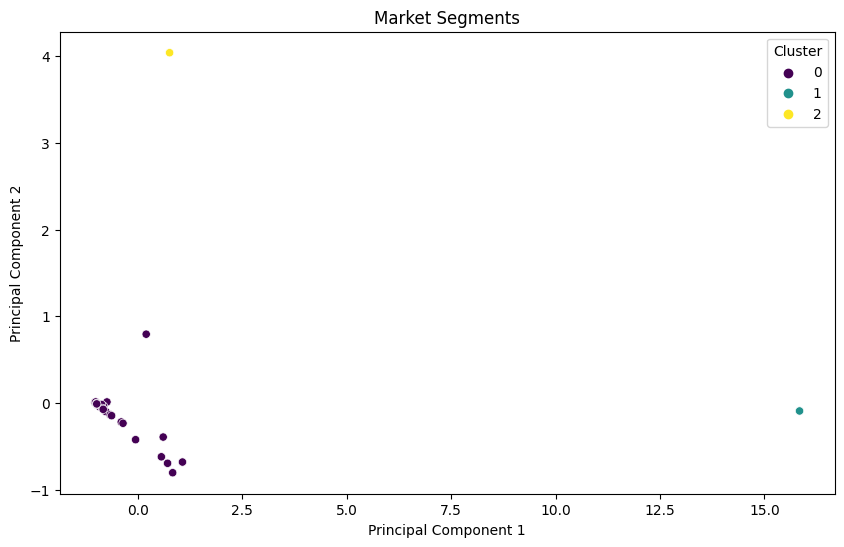

In [183]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Market Segments')
plt.show()


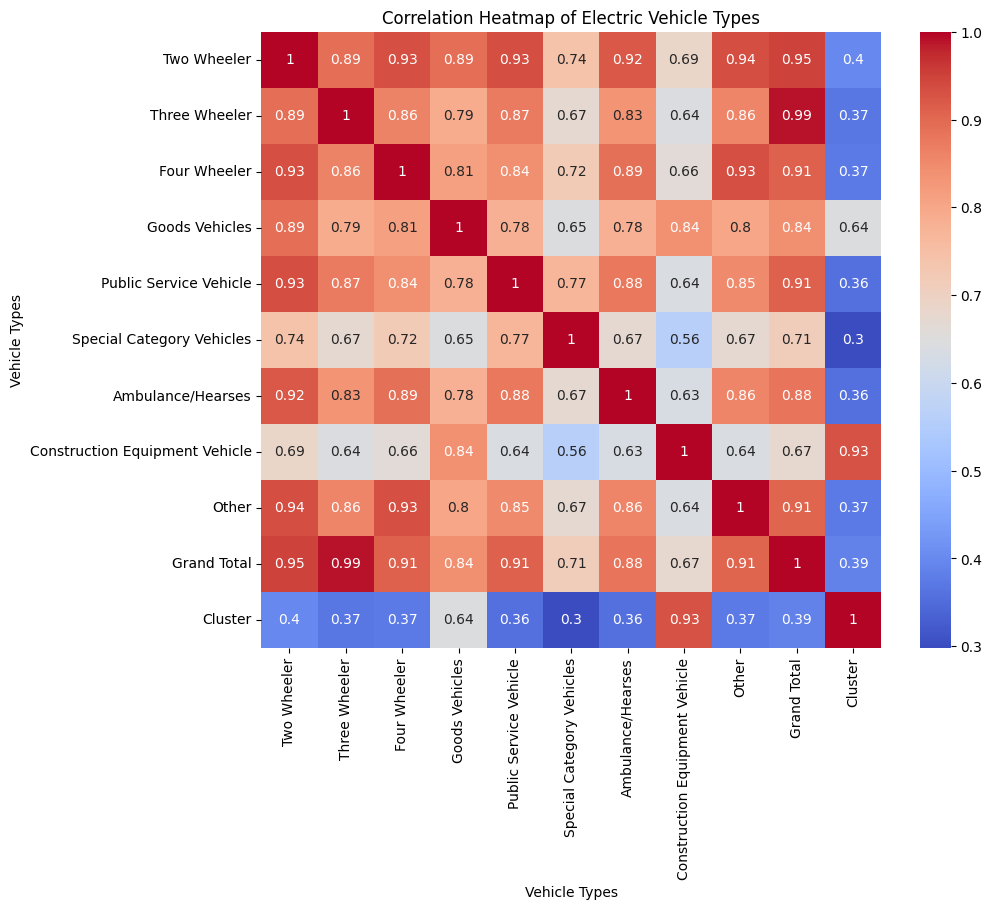

In [184]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add titles and labels as needed
plt.title('Correlation Heatmap of Electric Vehicle Types')
plt.xlabel('Vehicle Types')
plt.ylabel('Vehicle Types')

# Show the plot
plt.show()

In [185]:

# Function to identify states based on correlation criteria
def identify_states(data, type1, type2, threshold=0.75):
    high_type1 = data[type1] > data[type1].quantile(threshold)
    high_type2 = data[type2] > data[type2].quantile(threshold)
    return data[high_type1 & high_type2]['State Name'].tolist()

# Identifying States for Each Correlation
# Replace 'Type1', 'Type2', etc., with actual column names from your dataset
gt_three_wheeler_states = identify_states(data, 'Grand Total', 'Three Wheeler')
gt_two_wheeler_states = identify_states(data, 'Grand Total', 'Two Wheeler')
other_two_wheeler_states = identify_states(data, 'Other', 'Two Wheeler')
psv_two_wheeler_states = identify_states(data, 'Public Service Vehicle', 'Two Wheeler')
two_four_wheeler_states = identify_states(data, 'Two Wheeler', 'Four Wheeler')
other_four_wheeler_states = identify_states(data, 'Other', 'Four Wheeler')
ambulance_two_wheeler_states = identify_states(data, 'Ambulance/Hearses', 'Two Wheeler')
psv_gt_states = identify_states(data, 'Public Service Vehicle', 'Grand Total')
gt_four_wheeler_states = identify_states(data, 'Grand Total', 'Four Wheeler')
gt_other_states = identify_states(data, 'Grand Total', 'Other')

# Print the states for each correlation
print('Grand Total and Three Wheeler States:', gt_three_wheeler_states)
print('Two Wheeler and Grand Total States:', gt_two_wheeler_states)
print('Other and Two Wheeler States:', other_two_wheeler_states)
print('Public Service Vehicle and Two Wheeler States:', psv_two_wheeler_states)
print('Two Wheeler and Four Wheeler States:', two_four_wheeler_states)
print('Other and Four Wheeler States:', other_four_wheeler_states)
print('Ambulance/Hearses and Two Wheeler States:', ambulance_two_wheeler_states)
print('Public Service Vehicle and Grand Total States:', psv_gt_states)
print('Grand Total and Four Wheeler States:', gt_four_wheeler_states)
print('Grand Total and Other States:', gt_other_states)


Grand Total and Three Wheeler States: ['Bihar', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Grand Total']
Two Wheeler and Grand Total States: ['Delhi', 'Karnataka', 'Maharashtra', 'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'Grand Total']
Other and Two Wheeler States: ['Delhi', 'Gujarat', 'Karnataka', 'Maharashtra', 'Tamil Nadu', 'Grand Total']
Public Service Vehicle and Two Wheeler States: ['Gujarat', 'Karnataka', 'Maharashtra', 'Uttar Pradesh', 'Grand Total']
Two Wheeler and Four Wheeler States: ['Delhi', 'Gujarat', 'Karnataka', 'Grand Total']
Other and Four Wheeler States: ['Delhi', 'Gujarat', 'Karnataka', 'Grand Total']
Ambulance/Hearses and Two Wheeler States: ['Karnataka', 'Maharashtra', 'Rajasthan', 'Grand Total']
Public Service Vehicle and Grand Total States: ['Karnataka', 'Maharashtra', 'Uttar Pradesh', 'Grand Total']
Grand Total and Four Wheeler States: ['Delhi', 'Karnataka', 'Grand Total']
Grand Total and Other States: ['Delhi', 'Karnataka', 'Maharashtra', 'Tamil Nadu', 'Grand T

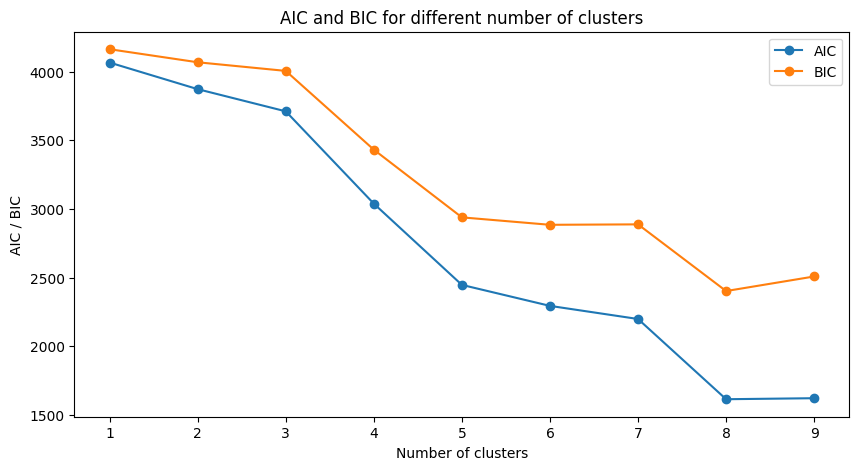

In [186]:
n_clusters = np.arange(1, 10)  # Adjust the range as needed

# Lists to store AIC and BIC values
aics = []
bics = []

# Calculate AIC and BIC for each number of clusters
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X)
    aics.append(gmm.aic(X))
    bics.append(gmm.bic(X))

# Plotting the AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('AIC / BIC')
plt.title('AIC and BIC for different number of clusters')
plt.legend()
plt.show()


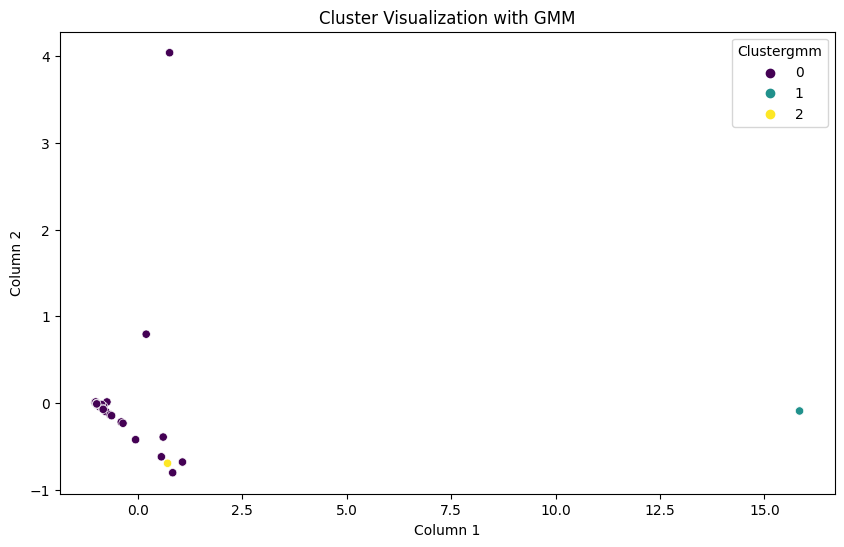

In [187]:
# Create and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Predict the cluster for each data point
clusters = gmm.predict(X)

# Add the cluster labels to your dataframe
data['Clustergmm'] = clusters

# Optionally, visualize the clusters (if you have 2D or 3D data)
# This is just an example for 2D data
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=data['Clustergmm'], palette='viridis')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Cluster Visualization with GMM')
plt.show()

Given the purpose for the mcd dataset and the aim of the exploration, the 5-cluster solution shows increased granularity and stability it offers can provide McDonald's with nuanced insights into brand perceptions, allowing for more targeted communication and intervention strategies. 

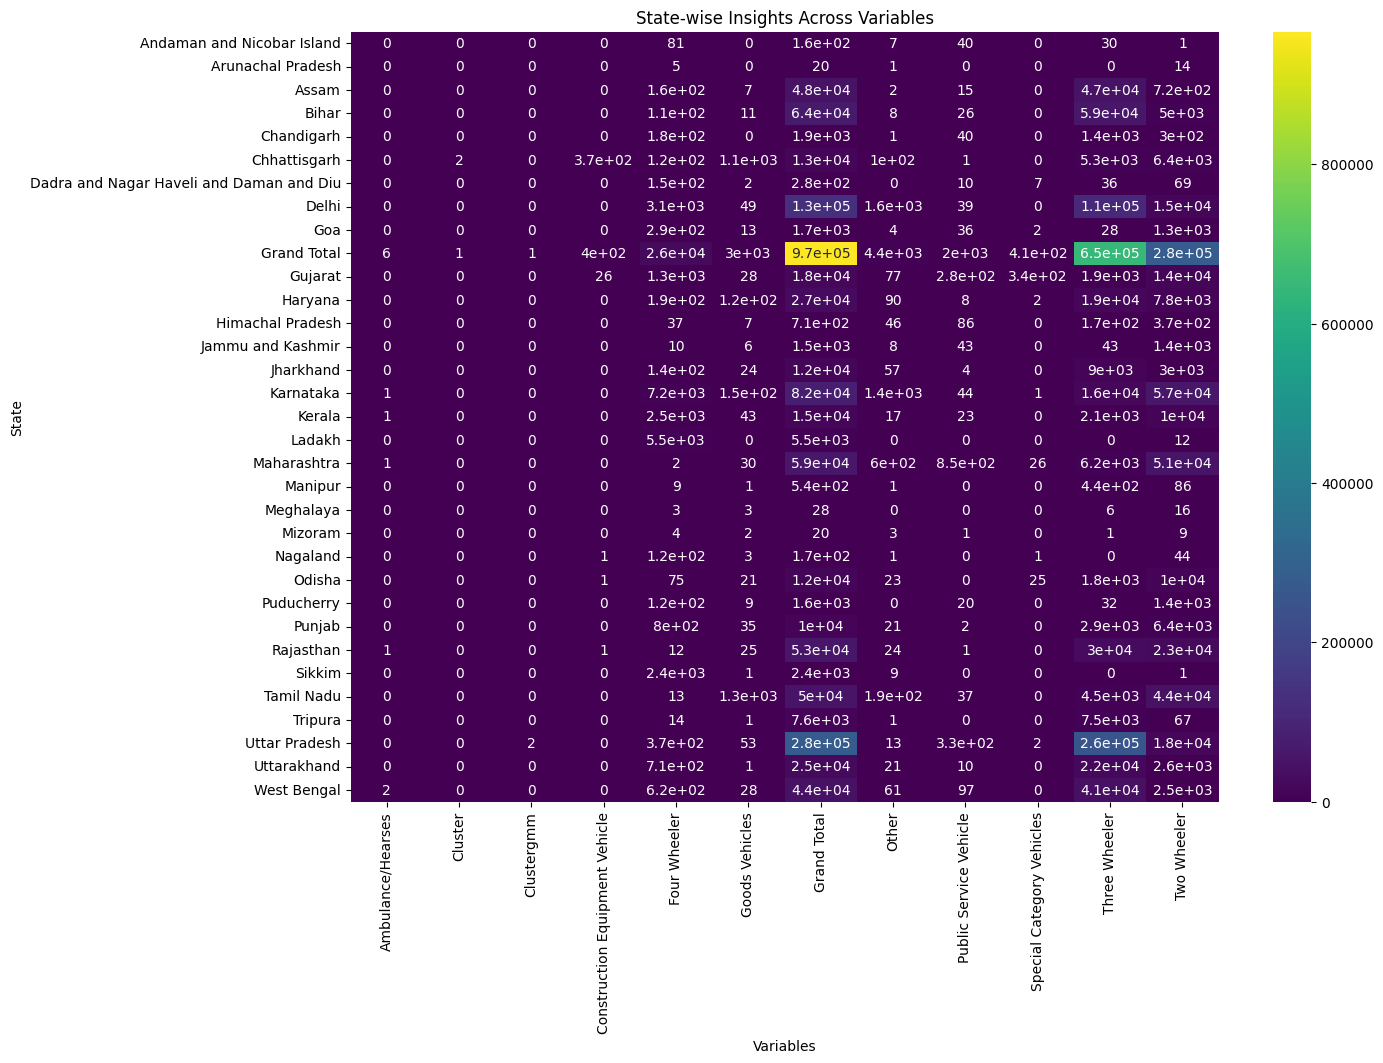

In [188]:
# Create a pivot table for the heatmap
pivot_table = data.pivot_table(index='State Name', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('State-wise Insights Across Variables')
plt.ylabel('State')
plt.xlabel('Variables')
plt.show()

In [189]:

data.tail()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,Cluster,Clustergmm
28,Dadra and Nagar Haveli and Daman and Diu,69,36.0,153,2.0,10.0,7.0,0.0,0.0,0.0,277,0,0
29,Uttar Pradesh,18295,257159.0,368,53.0,327.0,2.0,0.0,0.0,13.0,276217,0,2
30,Uttarakhand,2614,22096.0,709,1.0,10.0,0.0,0.0,0.0,21.0,25451,0,0
31,West Bengal,2540,40948.0,615,28.0,97.0,0.0,2.0,0.0,61.0,44291,0,0
32,Grand Total,282542,647186.0,26335,3036.0,2039.0,410.0,6.0,397.0,4412.0,966363,1,1


Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


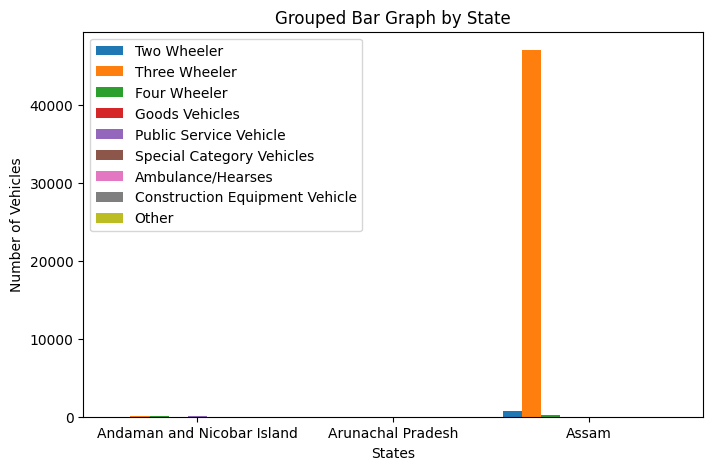

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


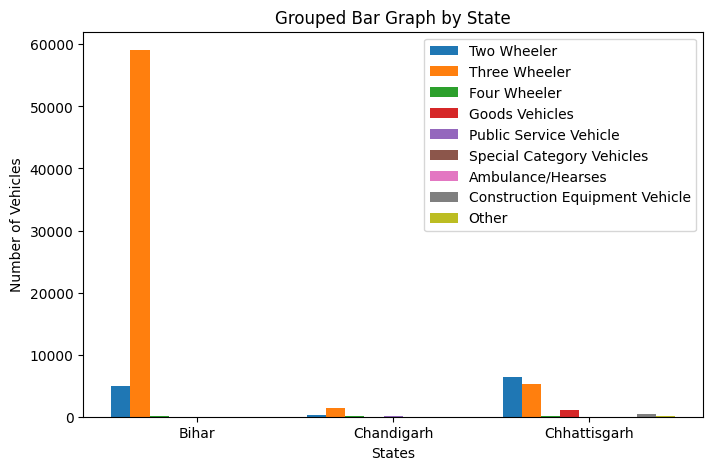

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


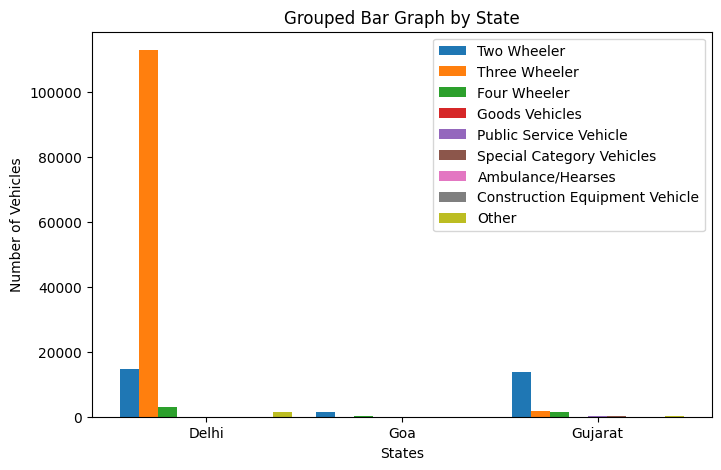

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


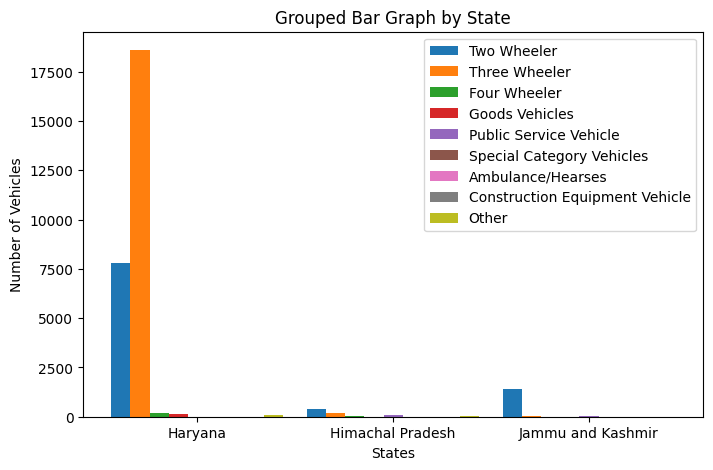

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


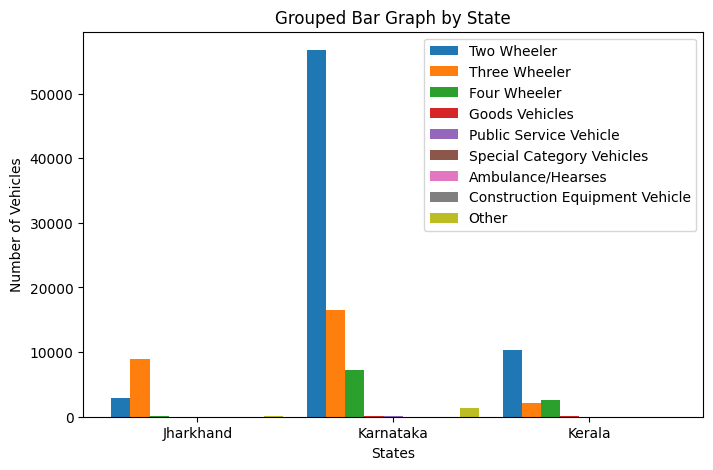

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


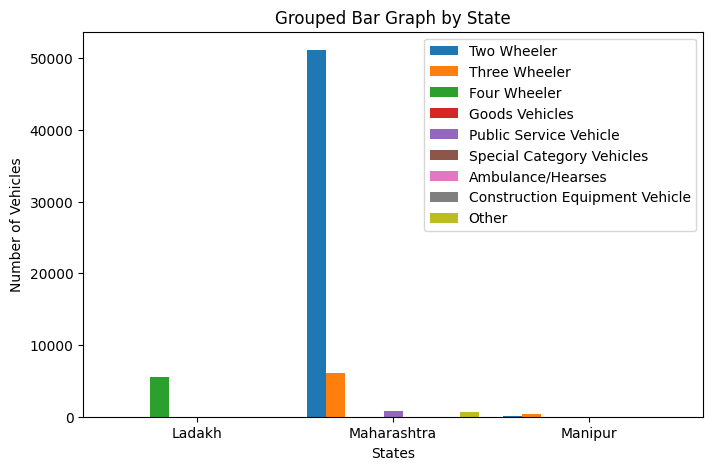

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


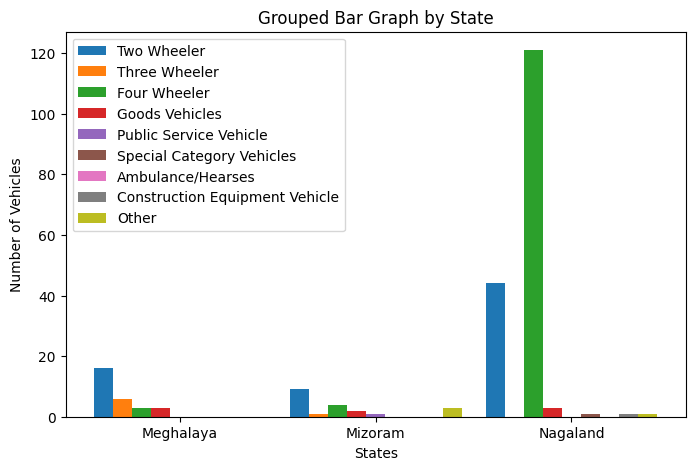

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


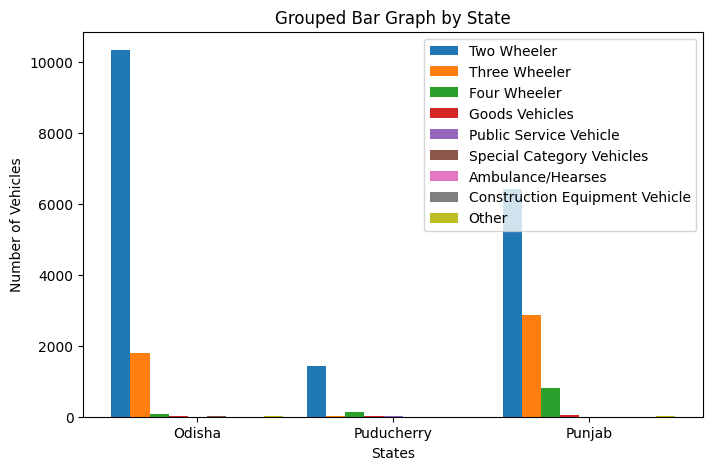

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


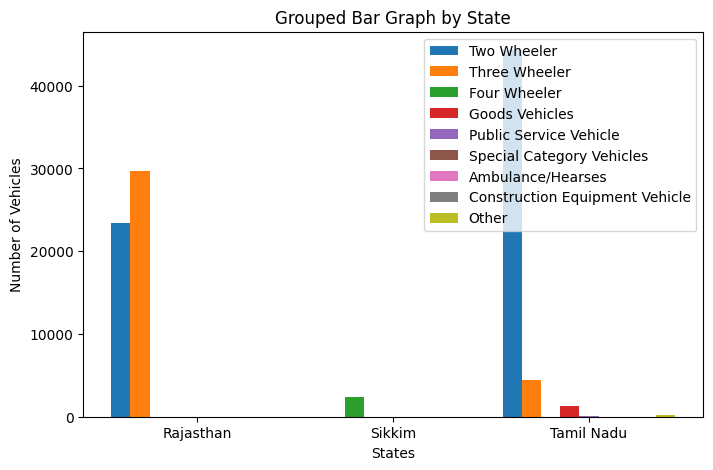

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


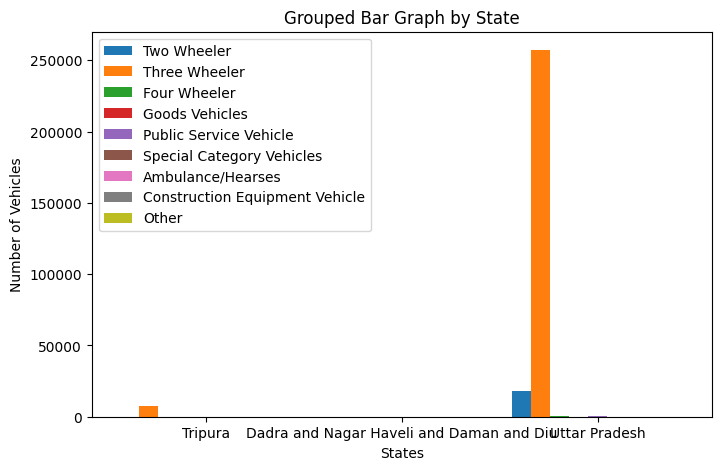

Index(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
       'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')


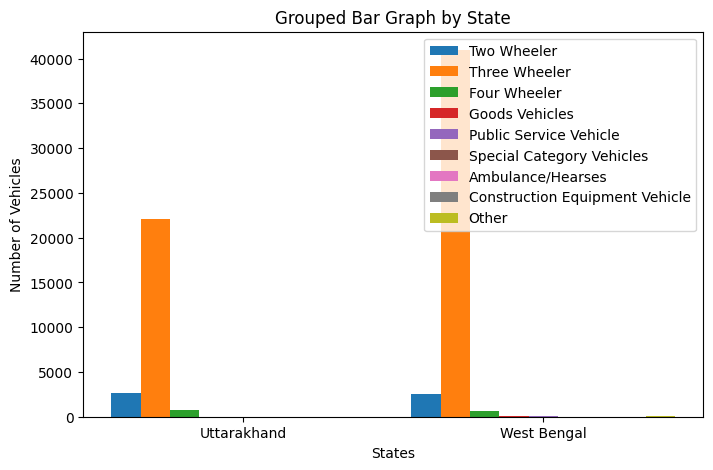

In [190]:
    
def groupbar(x,y):
    first10 = data.iloc[:][x:y]
    prop = data.drop(['State Name','Grand Total','Cluster','Clustergmm'],axis=1).iloc[:][x:y]
    # Setting the 'state' column as the index
    first10.set_index('State Name', inplace=True)
    first10.drop

    # Number of states (x-axis points)
    n_states = len(first10)

    # Number of variables (bars for each state)
    n_vars = len(prop.columns)
    print(prop.columns)

    # Preparing the data for plotting
    states = first10.index
    variables = prop.columns
    values = prop.values

    # Setting up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 5))

    # Adjusting the width of a bar to prevent overlapping
    # The width can be adjusted depending on the number of variables and states
    bar_width = 0.08

    # Increasing space between the groups of bars
    space_between_groups = 0.1

    # Setting up the x-axis positions for the groups of bars
    indices = np.arange(n_states) * (n_vars * bar_width + space_between_groups)

    # Plotting each set of bars
    for i in range(n_vars):
        ax.bar(indices + i * bar_width, values[:, i], width=bar_width, label=variables[i])

    # Setting the x-axis labels and positioning them in the center of the group of bars
    ax.set_xticks(indices + bar_width * (n_vars - 1) / 2)
    ax.set_xticklabels(states)


    # Adding labels and title
    ax.set_xlabel('States')
    ax.set_ylabel('Number of Vehicles')  # Setting the y-axis label
    ax.set_title('Grouped Bar Graph by State')

    # Adding a legend
    ax.legend()

    # Displaying the plot
    plt.show()

x = 0
for i in range(0,11):
    if i==10:
        groupbar(x,x+2)
        break
    groupbar(x,x+3)
    x=x+3
    

